In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import loading_data as ld
import visualizing_funcs as vf
import calculations as calc
from constants import *
from settings import *
from scipy.ndimage import label

In [2]:
#Find file with all data
filename = data_files_path + "/All_data_3D_temperature_17_dist_bins_nside_128.hdf5"

In [3]:
#Load data from file
data_dict = ld.load_3D_temperature_data(filename)

## Density
Flagging high density regions

In [4]:
#Get dEBV and clip negative values
dEBV = data_dict['dEBV']
dEBV = np.clip(dEBV, 0, None)

n_distslices = data_dict['nr_of_distance_bins'] #defined just to make things easier

In [5]:
#Plot dEBV
#vf.plot_dEBV(data_dict)

In [6]:
# Plot histogram of dEBV just to see values
# for ds_index in range(n_distslices):
#     plt.hist(dEBV[ds_index], bins=100, label='dEBV')
#     plt.yscale('log')
#     plt.show()

In [7]:
#Just plot high density pixels, just for visualizing

# primary_threshold = 0.7

# for ds_index in range(n_distslices):
#     # Create an array that is True when density is above threshold, False otherwise
    
#     binary_mask = dEBV[ds_index] > primary_threshold
    
#     # Create an empty map for high-density regions
#     high_density_map = np.zeros_like(dEBV[ds_index])
    
#     # Make locations where binary mask is True have the value of dEBV, otherwise 0 (from intialization)
#     high_density_map[binary_mask] = dEBV[ds_index][binary_mask]
    
#     # Visualize the high-density regions
#     hp.mollview(high_density_map, title=f'High density regions slice {ds_index}', nest=True, cbar=True)
#     plt.show()

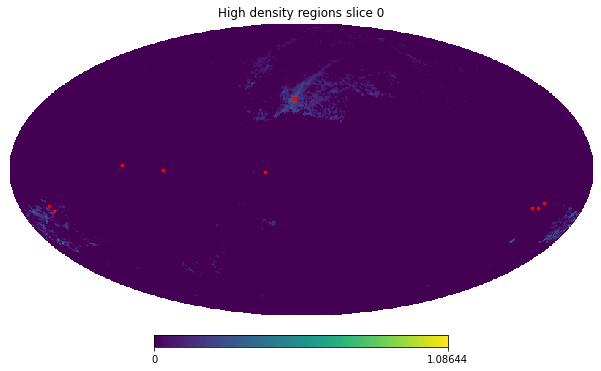

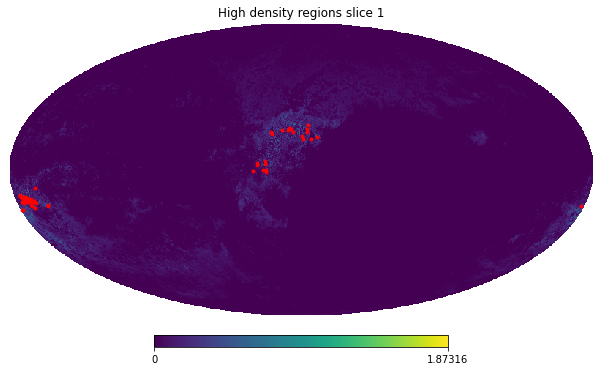

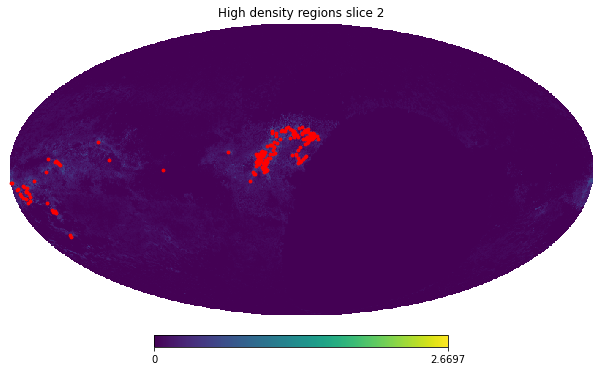

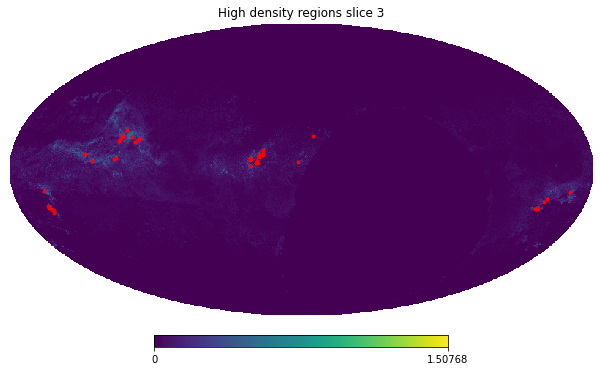

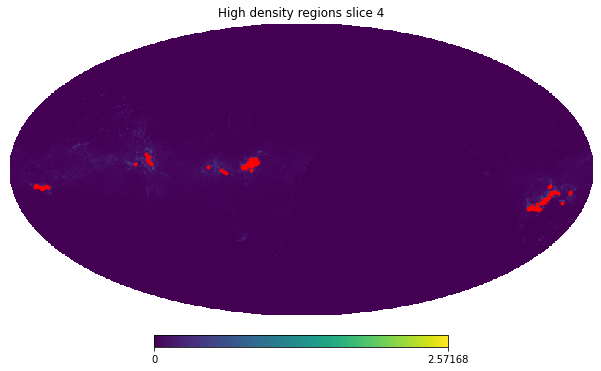

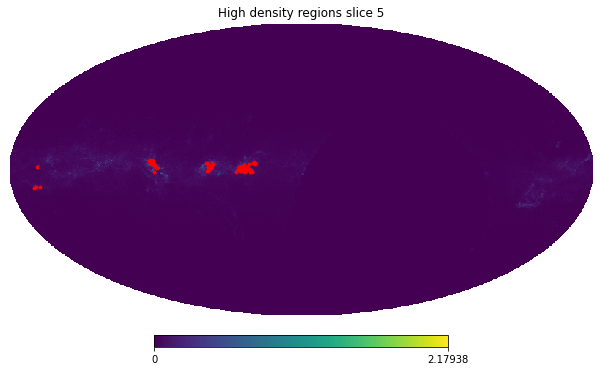

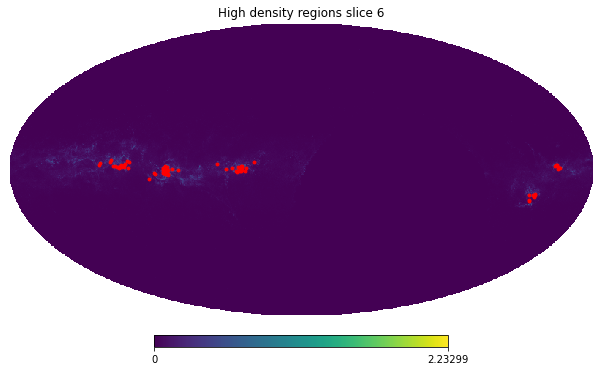

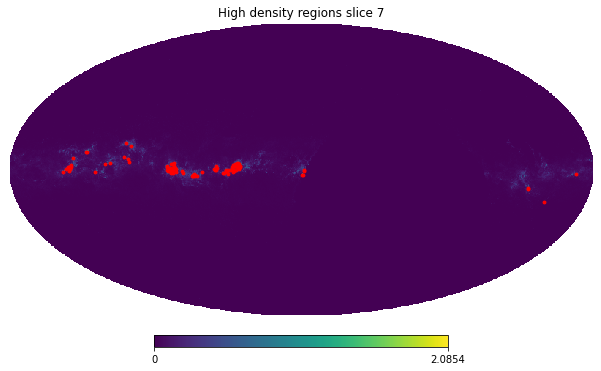

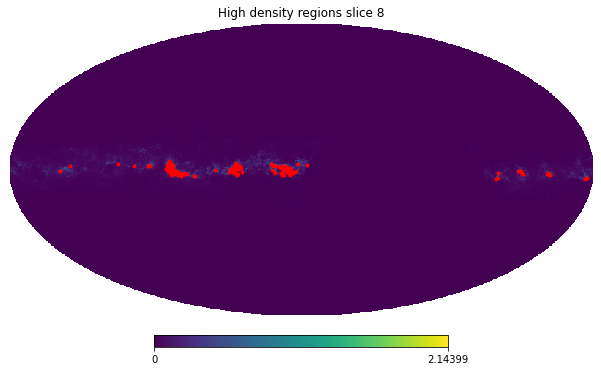

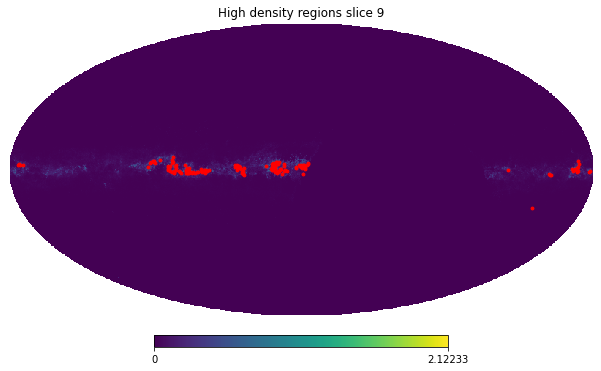

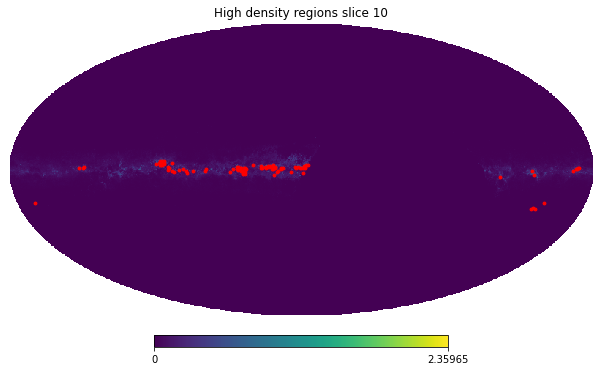

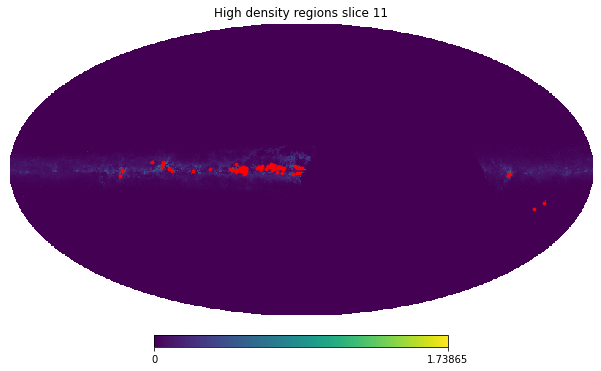

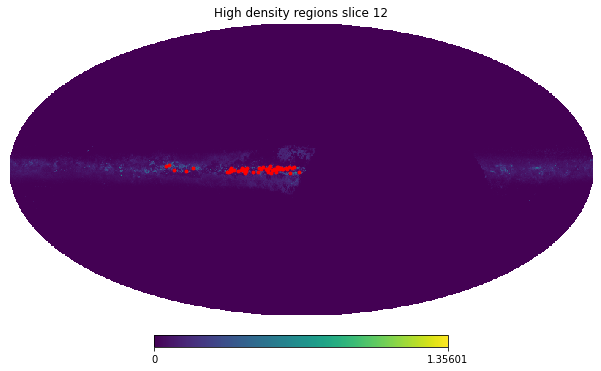

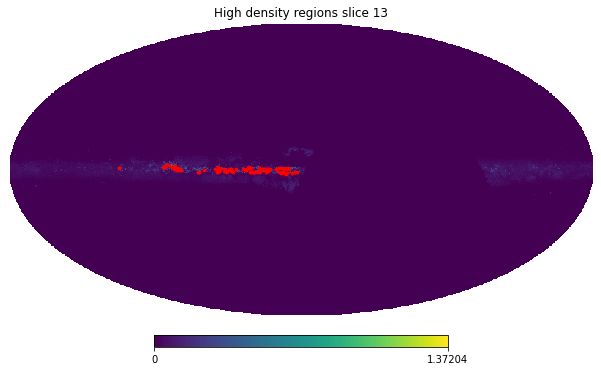

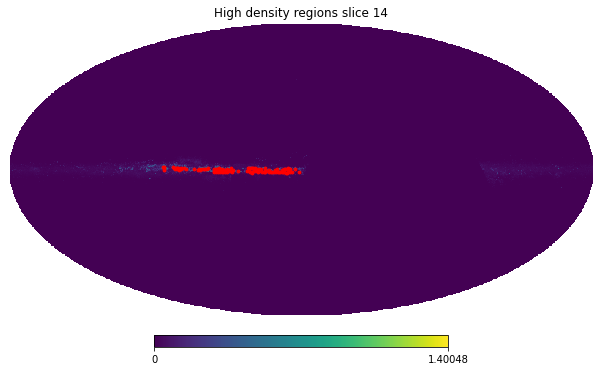

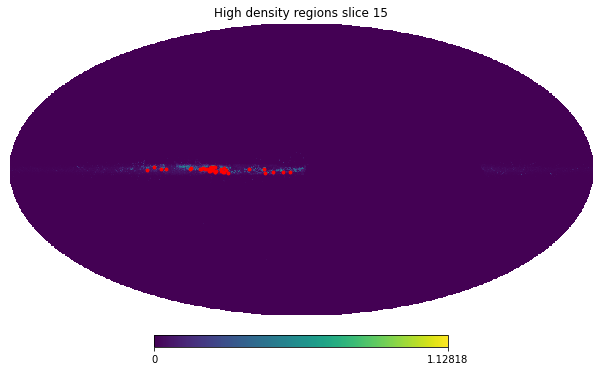

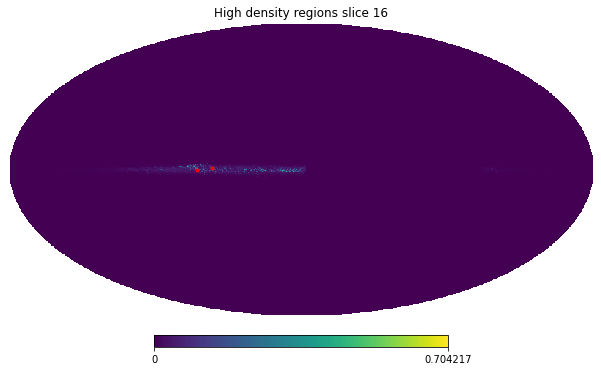

In [8]:
#Instead of pixels get high density regions so that they can be marked on map

nside = hp.get_nside(dEBV[0])

region_info, region_maps = calc.get_highdEBV_regions(nside, n_distslices, dEBV, 0.8, 0.5, 0.6)

vf.overplot_regions_mollview(region_info, dEBV, n_distslices)

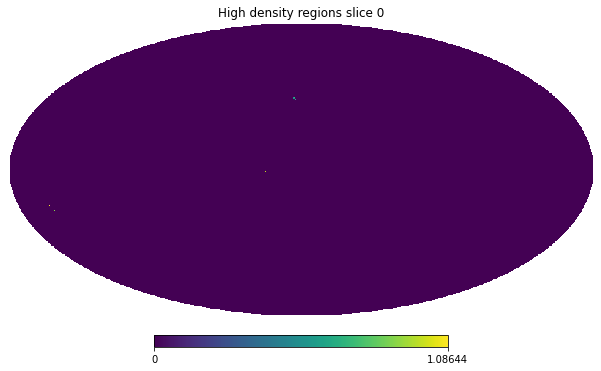

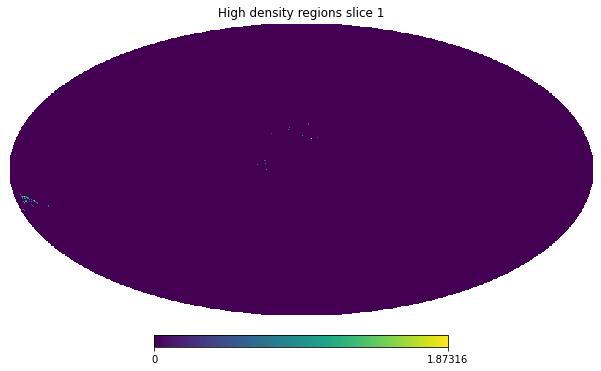

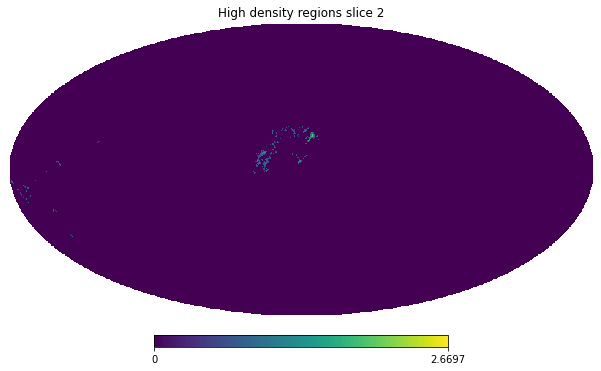

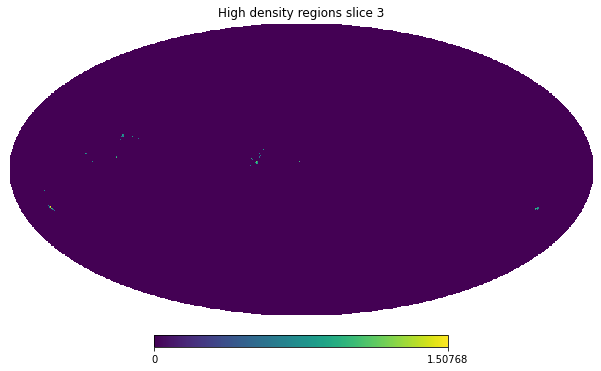

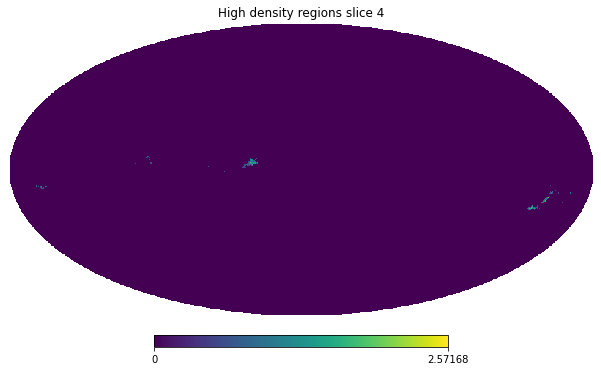

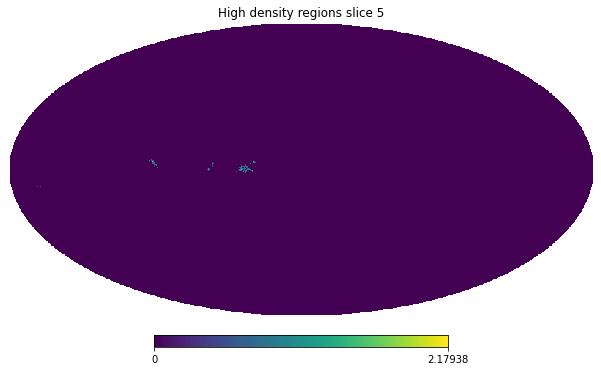

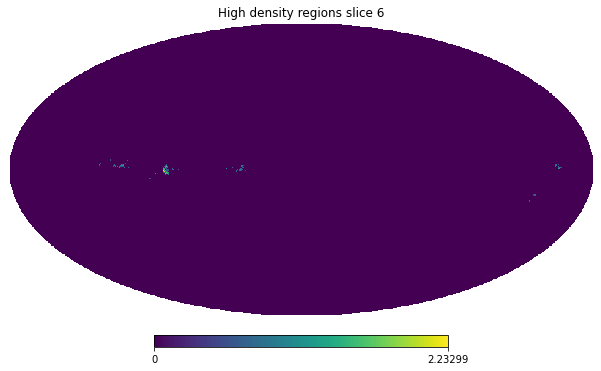

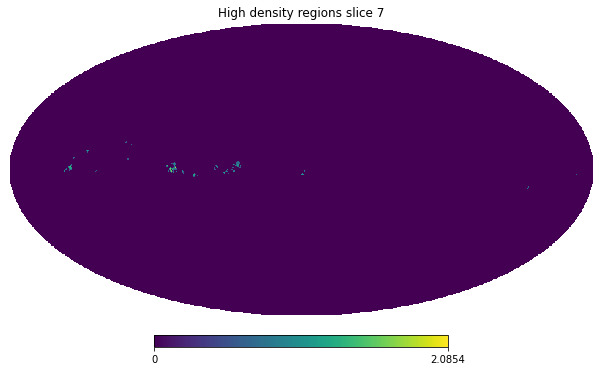

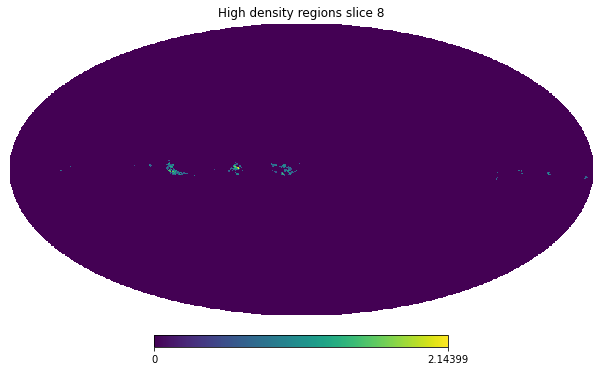

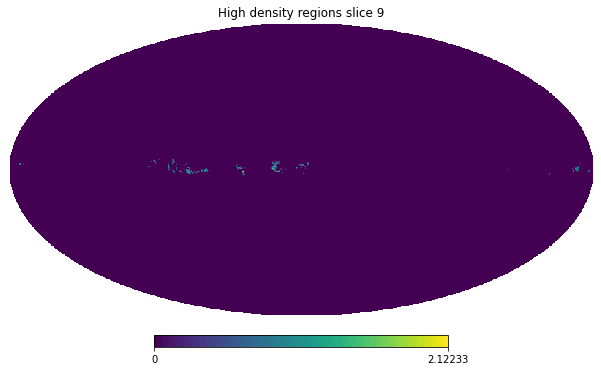

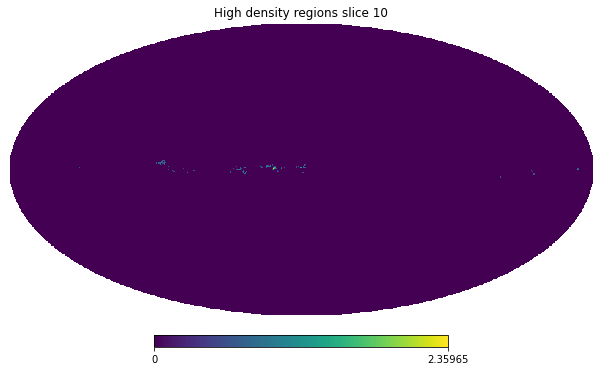

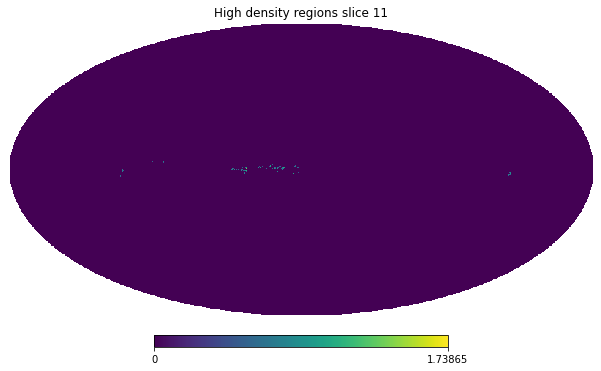

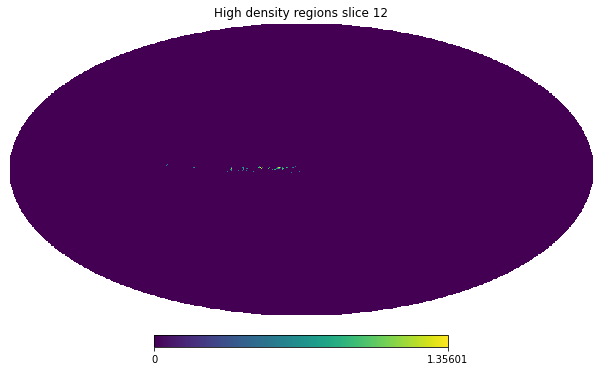

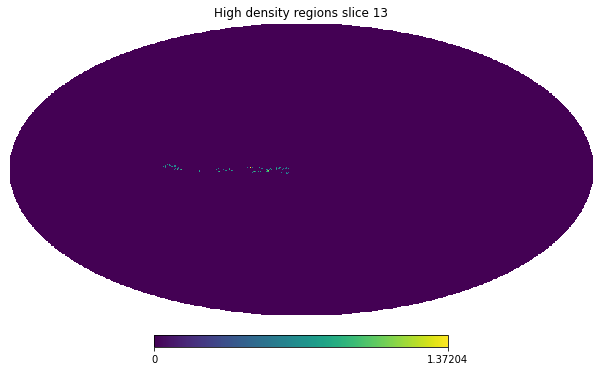

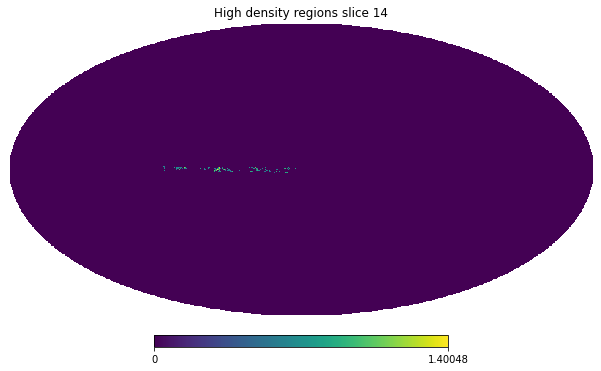

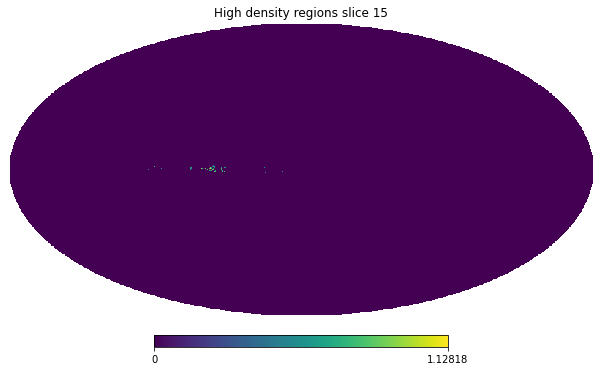

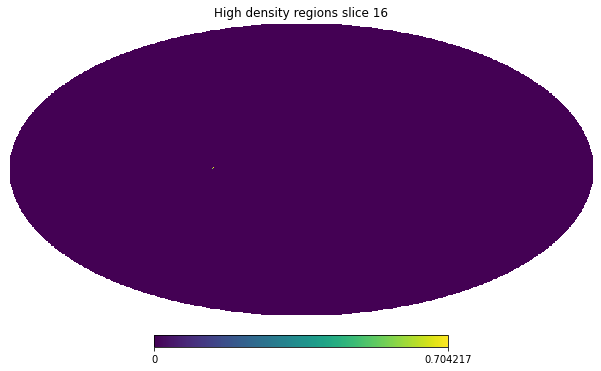

In [9]:
#Plot high density regions 
for ds_index in range(n_distslices):
    hp.mollview(region_maps[ds_index], title=f'High density regions slice {ds_index}', nest=True, cbar=True)

In [10]:
#Checking number of regions in each distance slice
for ds_index in range(n_distslices):
    print(f"Number of regions in slice {ds_index}: {len(region_info[ds_index])}")

Number of regions in slice 0: 11
Number of regions in slice 1: 56
Number of regions in slice 2: 181
Number of regions in slice 3: 46
Number of regions in slice 4: 102
Number of regions in slice 5: 65
Number of regions in slice 6: 83
Number of regions in slice 7: 100
Number of regions in slice 8: 153
Number of regions in slice 9: 154
Number of regions in slice 10: 97
Number of regions in slice 11: 72
Number of regions in slice 12: 58
Number of regions in slice 13: 79
Number of regions in slice 14: 111
Number of regions in slice 15: 36
Number of regions in slice 16: 2


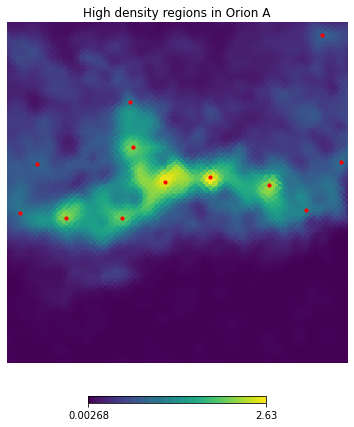

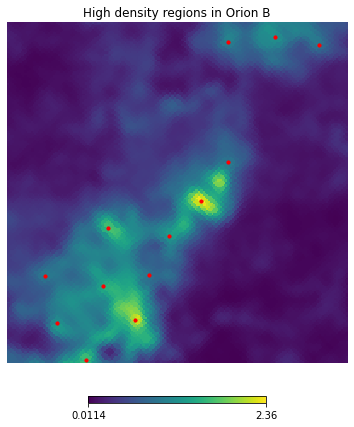

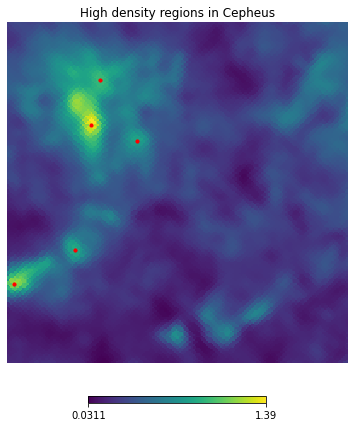

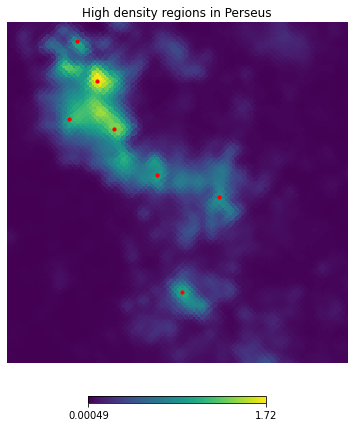

In [12]:
#Look at regions in each molecular cloud

vf.overplot_region_gnomview(region_info, dEBV, d_orion, rot=[l_orionA,b_orionA], title='High density regions in Orion A')
vf.overplot_region_gnomview(region_info, dEBV, d_orion, rot=[l_orionB,b_orionB], title='High density regions in Orion B')

vf.overplot_region_gnomview(region_info, dEBV, d_ceph, rot=[l_ceph,b_ceph], title='High density regions in Cepheus')

vf.overplot_region_gnomview(region_info, dEBV, d_perseus, rot=[l_perseus,b_perseus], title='High density regions in Perseus')


In [13]:
#Can use this to filter regions but not really necessary
#orion_regions, orion_regions_all = calc.get_region_maps(region_info, nside, d_orion, filter=True, rot=[l_orionA, b_orionA], radius = 0.2, combine=True)
#hp.mollview(orion_regions_all, title='Orion A Region', nest=True, cbar=True)

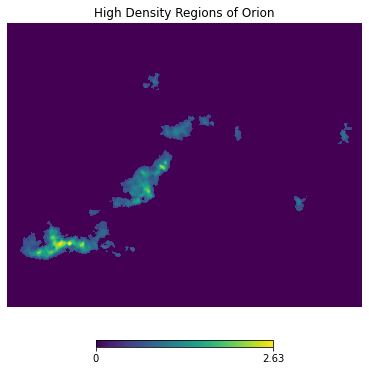

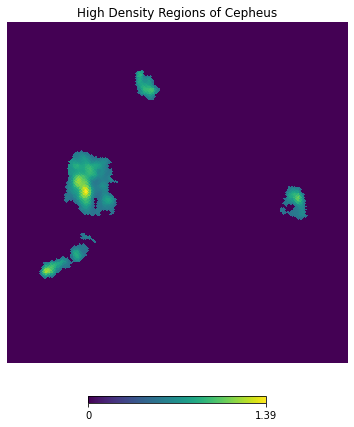

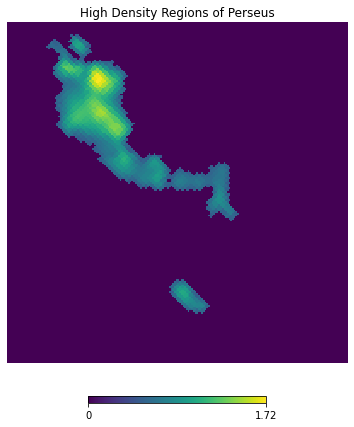

In [14]:
#Take a look at what the regions actually look like

hp.gnomview(region_maps[d_orion], rot=[l_orionB-2, b_orionB], xsize=1000, ysize=800, nest=True, title='High Density Regions of Orion', cbar=True, notext=True)
hp.gnomview(region_maps[d_ceph], rot=[l_ceph-1.5, b_ceph+1], xsize=400, ysize=400, nest=True, title='High Density Regions of Cepheus', cbar=True, notext=True)
hp.gnomview(region_maps[d_perseus], rot=[l_perseus, b_perseus], xsize=200, ysize=200, nest=True, title='High Density Regions of Perseus', cbar=True, notext=True)

## Temperature